In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import cv2

In [145]:
filename = "checkers.mp4"
vid = imageio.get_reader(filename, "ffmpeg")
# Positions contain frames of video that have distinct positions.
positions = [0, 100, 225, 350]

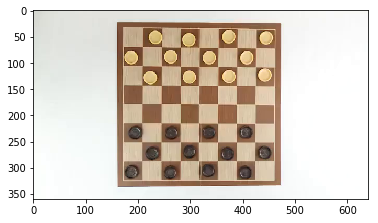

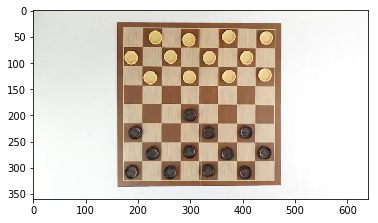

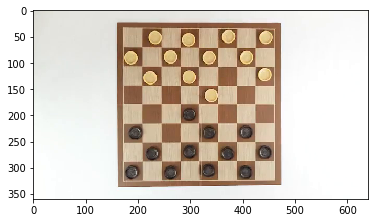

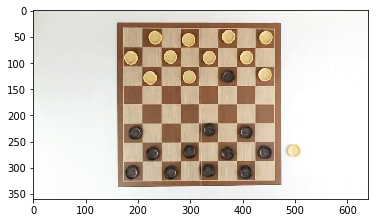

In [146]:
for position in positions:
    fig = plt.figure()
    plt.imshow(vid.get_data(position))
plt.show()

In [147]:
img = vid.get_data(positions[3])
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
found, corners = cv2.findChessboardCorners(img, (7, 7), None)
found, corners

(False, None)

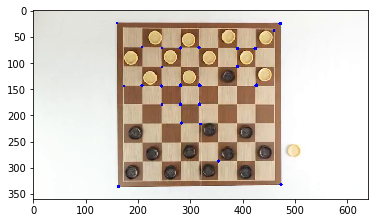

In [148]:
corners = cv2.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int0(corners)
circle_img = img.copy()
for i in corners:
    x,y = i.ravel()
    cv2.circle(circle_img,(x,y),3,(0,0,255),-1)

plt.imshow(circle_img)


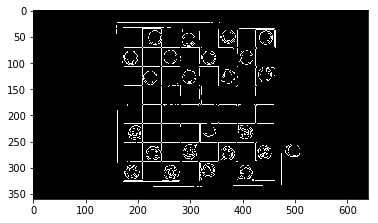

In [149]:
edges = cv2.Canny(gray,50,150,apertureSize = 3)
plt.imshow(edges,cmap="gray")

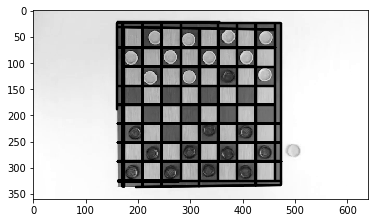

In [150]:
minLineLength=100
lines = cv2.HoughLinesP(image=edges,rho=1,theta=np.pi/180, threshold=100,lines=np.array([]), minLineLength=minLineLength,maxLineGap=80)
gray_lines = gray.copy()
a,b,c = lines.shape
for i in range(a):
    cv2.line(gray_lines, (lines[i][0][0], lines[i][0][1]), (lines[i][0][2], lines[i][0][3]), (0, 0, 255), 3, cv2.LINE_AA)
    cv2.imwrite('houghlines.jpg',gray_lines)
plt.imshow(gray_lines, cmap="gray")

In [151]:
# x1, x2, y1, y2
lines

array([[[171, 337, 171,  23]],

       [[161, 216, 473, 216]],

       [[209, 337, 209,  23]],

       [[195, 337, 473, 333]],

       [[462, 323, 462,  24]],

       [[161, 252, 473, 252]],

       [[282, 325, 282,  23]],

       [[473, 332, 473,  24]],

       [[160, 144, 460, 144]],

       [[245, 336, 245,  23]],

       [[425, 334, 425,  24]],

       [[389, 325, 389,  24]],

       [[160,  71, 463,  71]],

       [[160, 180, 460, 180]],

       [[160,  23, 357,  23]],

       [[160, 189, 160,  24]],

       [[353, 325, 353,  24]],

       [[318, 325, 318,  34]],

       [[173, 107, 426, 107]],

       [[161, 288, 474, 288]],

       [[243, 108, 460, 108]],

       [[159,  32, 460,  37]],

       [[173, 337, 173,  33]],

       [[280, 325, 474, 325]],

       [[317, 336, 317,  34]],

       [[339,  24, 472,  24]],

       [[354, 287, 354,  34]],

       [[162, 326, 278, 326]],

       [[161, 287, 474, 287]],

       [[208,  72, 460,  72]],

       [[162, 324, 279, 324]]], dtype=in

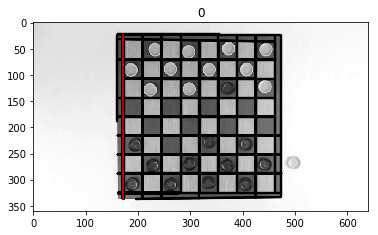

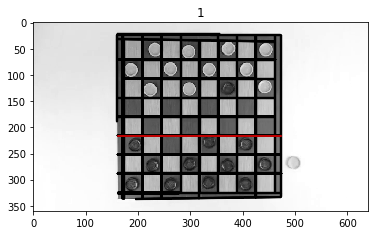

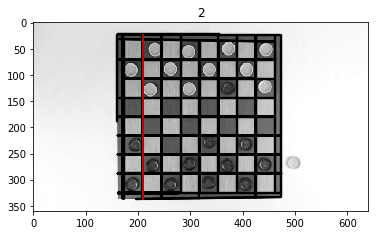

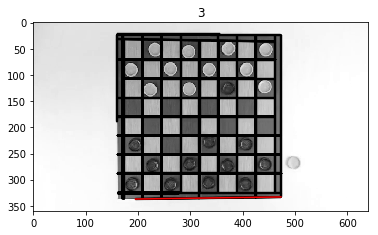

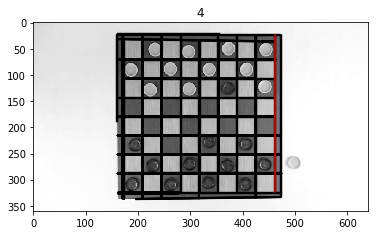

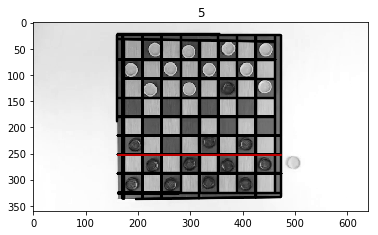

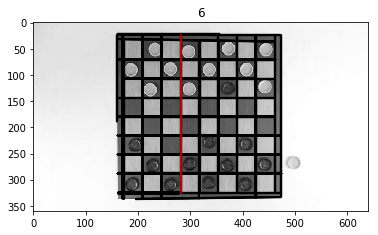

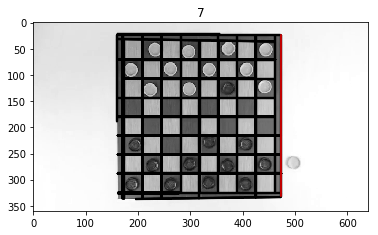

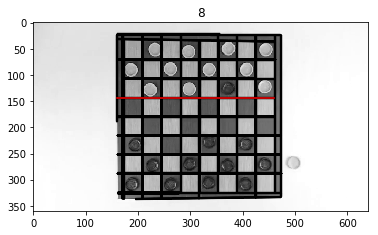

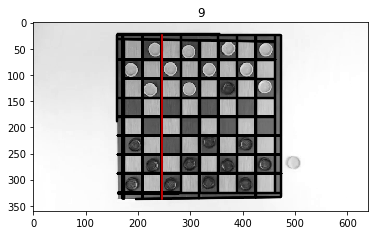

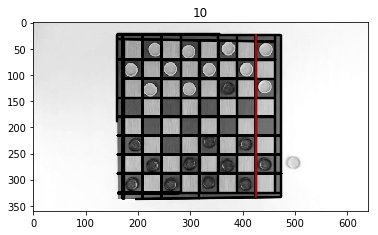

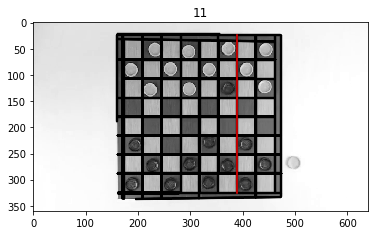

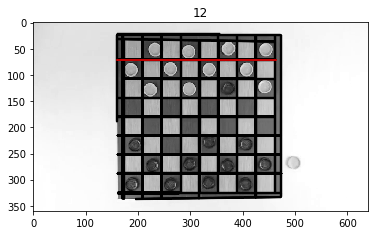

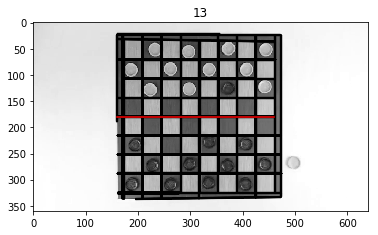

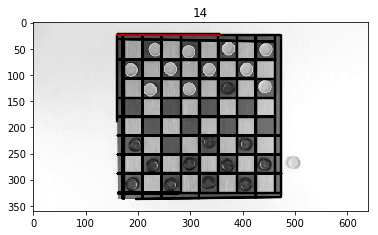

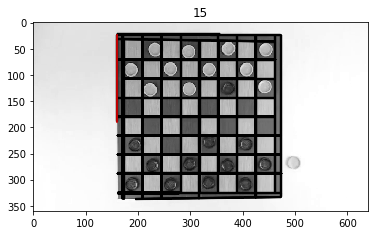

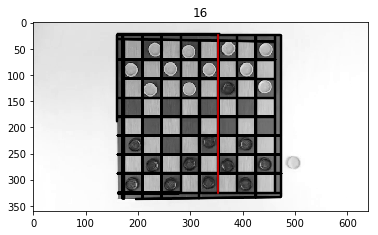

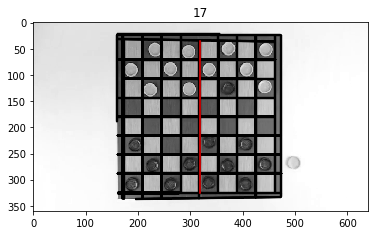

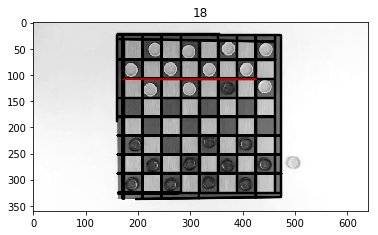

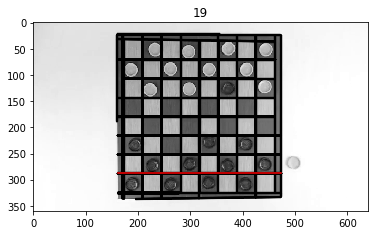

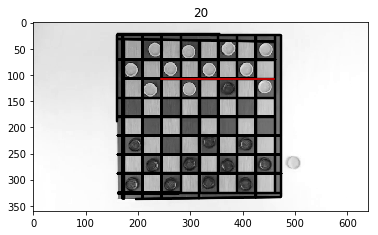

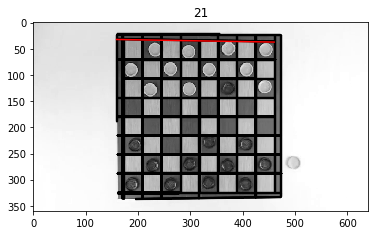

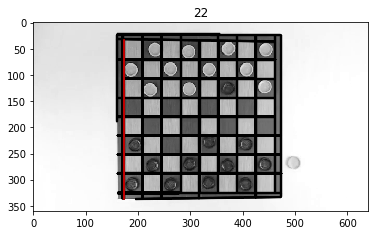

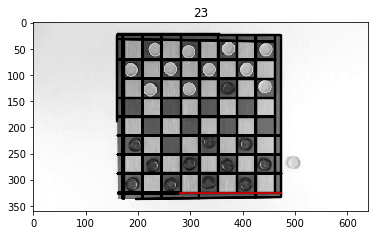

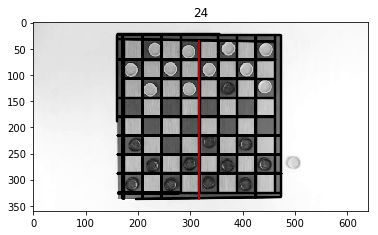

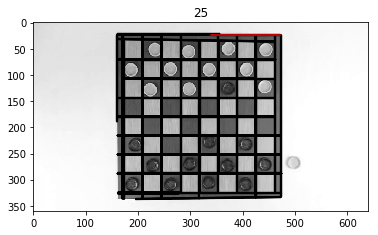

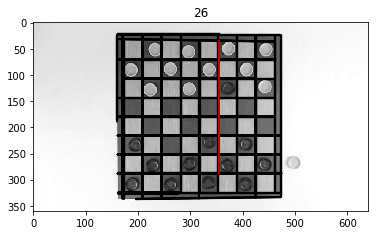

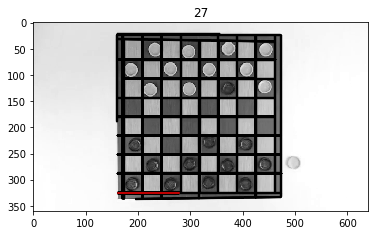

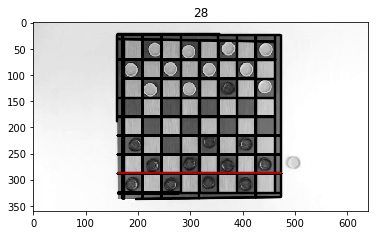

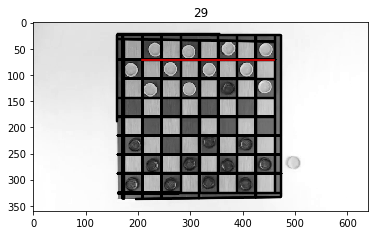

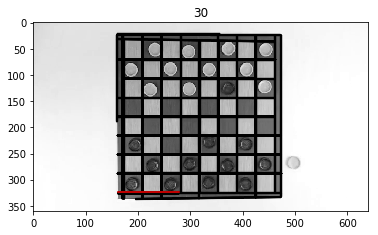

In [152]:
for i in range(len(lines)):
    fig, ax = plt.subplots()
    ax.imshow(gray_lines, cmap="gray")
    ax.plot([lines[i][0][0],lines[i][0][2]],[lines[i][0][1],lines[i][0][3]], c="r")
    plt.title(str(i))

In [153]:
maxx = max(map(lambda x: max(x[0][0],x[0][2]), lines))
minx = min(map(lambda x: min(x[0][0],x[0][2]), lines))
maxy = max(map(lambda x: max(x[0][1],x[0][3]), lines))
miny = min(map(lambda x: min(x[0][1],x[0][3]), lines))


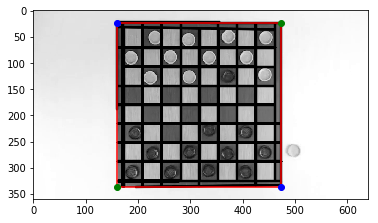

In [154]:
fig, ax = plt.subplots()
ax.imshow(gray_lines, cmap="gray")
ax.plot([minx, minx],[miny, maxy] , c="r")
ax.plot([minx, maxx],[maxy, maxy] , c="r")
ax.plot([minx, maxx],[miny, miny] , c="r")
ax.plot([maxx, maxx],[miny, maxy] , c="r")
bottom_left = [minx, maxy]
top_left = [minx, miny]
bottom_right = [maxx, maxy]
top_right = [maxx, miny]
ax.plot(*bottom_left, "go")
ax.plot(*top_left, "bo")
ax.plot(*top_right, "go")
ax.plot(*bottom_right, "bo")

In [166]:
# Homography to get this square
pts_src = np.array([top_left, bottom_left, bottom_right, top_right])
pts_dst = np.array([[0, 0], [0, 1], [1, 1], [1, 0]])
h, status = cv2.findHomography(pts_src, pts_dst)
h

array([[ 0.0031746 ,  0.        , -0.5047619 ],
       [ 0.        ,  0.00318471, -0.07324841],
       [ 0.        ,  0.        ,  1.        ]])

In [ ]:
# Not sure what I am doing wrong here, need to debug
im_dst = cv2.warpPerspective(img, h, (256,256))
plt.imshow(im_dst)

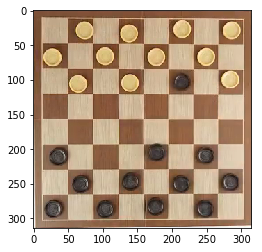

In [177]:
# Simple crop works though
crop_img = img[miny:maxy, minx:maxx]
plt.imshow(crop_img)

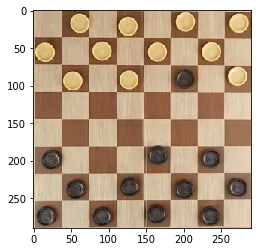

In [196]:
# for border, should compute automatically though
ff = 12
crop_img = img[miny+ff:maxy-ff, minx+ff:maxx-ff]
plt.imshow(crop_img)

0 0 7.083333333333333 192
1 0 30.891203703703702 210
2 0 8.657407407407407 210
3 0 41.5162037037037 213
4 0 7.87037037037037 201
5 0 44.074074074074076 223
6 0 7.280092592592593 212
7 0 46.041666666666664 225
0 1 43.28703703703704 211
1 1 7.87037037037037 201
2 1 34.432870370370374 219
3 1 13.57638888888889 199
4 1 36.2037037037037 222
5 1 14.166666666666666 214
6 1 36.79398148148148 223
7 1 13.57638888888889 223
0 2 5.3125 201
1 2 36.40046296296296 217
2 2 16.52777777777778 207
3 2 38.1712962962963 219
4 2 13.969907407407407 204
5 2 38.1712962962963 66
6 2 13.57638888888889 216
7 2 39.155092592592595 234
0 3 13.57638888888889 133
1 3 14.756944444444445 212
2 3 14.166666666666666 138
3 3 13.773148148148149 206
4 3 15.543981481481481 137
5 3 13.57638888888889 219
6 3 13.57638888888889 153
7 3 13.969907407407407 226
0 4 13.57638888888889 206
1 4 13.773148148148149 137
2 4 14.756944444444445 206
3 4 13.57638888888889 142
4 4 16.52777777777778 212
5 4 14.166666666666666 149
6 4 14.16666666

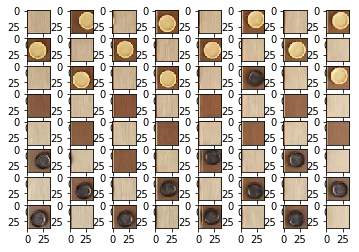

In [237]:
dx = (maxx - minx - 2 * ff)//8
dy = (maxy - miny - 2 * ff)//8
img_board = []
board = []
for j in range(8):
    img_board.append([])
    board.append([])
    for i in range(8):
        plt.subplot(8, 8, j * 8 + i + 1)
        square = crop_img[dy*j:dy*(j+1),dx*i:dx*(i+1)]
        # Cutoff of 25 counts how many edges there are from canny detection
        # more edges, means circlular checker on board
        m = np.mean(cv2.Canny(square[:, :, 0],50,150,apertureSize = 3))
        plt.imshow(square)
        # Calc shape
        x, y, _ = square.shape
        center_color = square[x//2, y//2, 0]
        print(i, j, m, center_color)
        img_board[-1].append(square)
        if m > 25:
            if center_color > 255/2:
                board[-1].append(1)
            else:
                board[-1].append(-1)
        else:
            board[-1].append(0)

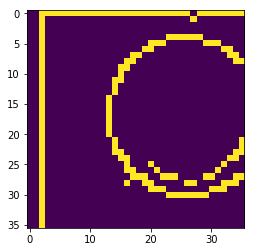

In [238]:
plt.imshow(cv2.Canny(img_board[0][1][:, :, 0],50,150,apertureSize = 3))
plt.show()

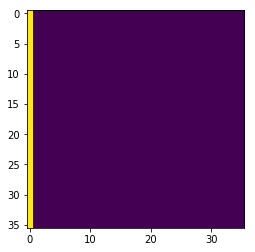

In [239]:
plt.imshow(cv2.Canny(img_board[0][0][:, :, 0],50,150,apertureSize = 3))
plt.show()

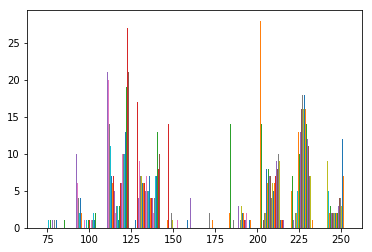

In [240]:
plt.hist(img_board[2][3][:, :, 0])
plt.show()

In [245]:
mapping = {0: "_", 1:"+", -1:"o"}
def pretty_print_board(board):
    for j in range(8):
        print("", end="|")
        for i in range(8):
            c = board[j][i]
            print(mapping[c], end="|")
        print()
pretty_print_board(board)

|_|+|_|+|_|+|_|+|
|+|_|+|_|+|_|+|_|
|_|+|_|+|_|o|_|+|
|_|_|_|_|_|_|_|_|
|_|_|_|_|_|_|_|_|
|o|_|_|_|o|_|o|_|
|_|o|_|o|_|o|_|o|
|o|_|o|_|o|_|o|_|


(36, 36, 3)